In [1]:
# from sklearn.datasets import make_multilabel_classification
from torch.utils.data import Dataset
import json
import numpy as np
import torch
import time
from tqdm import tqdm
from NN_Models import *
import torch.optim as optim

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X_train = torch.load('data/X_author_train.pt')
y_train = torch.load('data/y_train.pt')
# X_train = torch.load('data/X_author_embedding_train.pt')
# y_train = torch.load('data/y_train.pt')

X_test = torch.load('data/X_author_test.pt')
y_test = torch.load('data/y_test.pt')

In [3]:
num_samples, num_features = X_train.shape

print(X_train.shape)
print(X_test.shape)

torch.Size([6268, 21146])
torch.Size([3086, 21146])


In [4]:
# train data loader
train_dataset, train_dataloader = BinaryDataLoader(X_train, y_train, shuffle=True, batch_size=100)

NeuralNetworkCoauthor(
  (fc1): Linear(in_features=21146, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=100, bias=True)
)


100%|██████████| 100/100 [19:24<00:00, 11.64s/it]


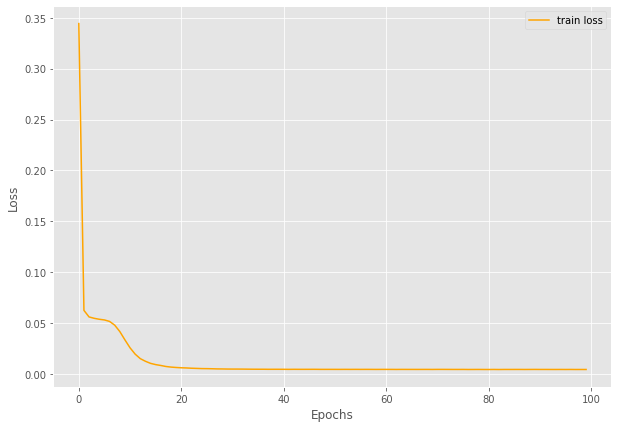

In [5]:
# import torch.optim as optim

model = Model()

model.set_dim(num_features)

model.coauthor_model()
print(model.coauthor_model())

learning_rate = 0.001
optimizer = optim.Adam(params=model.coauthor_model().parameters(), lr=learning_rate) # 学习率衰减 / 学习率震荡
epochs = 100
model.train(train_dataloader, optimizer, epochs)

model.save_status("coauthor")
model.plot_loss()

### Test (ignore when submit kaggle)

In [6]:
from evaluation import evaluation

# print some info
print(f"[INFO]: Number of testing samples: {X_test.shape[0]}")
print(f"[INFO]: Number of testing features: {X_test.shape[1]}")

thresholds = np.linspace(0, 1, 10)
logits = model.predict(X_test)
f1_scores = evaluation(logits, y_test, thresholds)

[INFO]: Number of testing samples: 3086
[INFO]: Number of testing features: 21146


100%|██████████| 10/10 [00:37<00:00,  3.70s/it]


In [7]:
# f1_scores

In [8]:
print(thresholds[f1_scores.index(max(f1_scores))])
print(max(f1_scores))

# print(f1_scores[thresholds.index(0.5)])

0.4444444444444444
0.6576906459278463


- 0.4
- 0.6123094421627225

In [9]:
from preprocessing import for_kaggle
from evaluation import kaggle_predict

kaggle_predict(model, X_train, 'author_train')
kaggle_predict(model, X_test, 'author_test')

# Kaggle Predictions

100%|██████████| 100/100 [30:05<00:00, 18.06s/it]


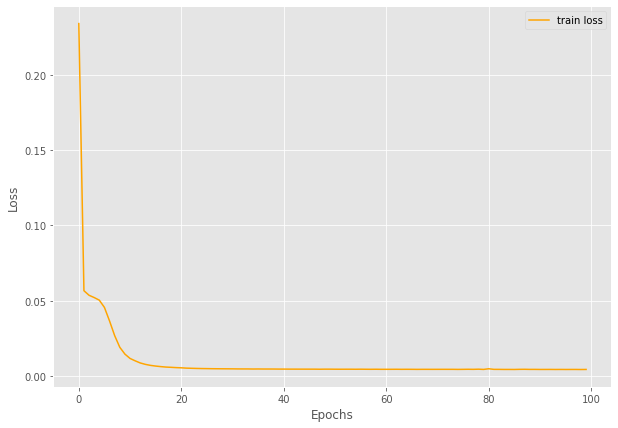

In [11]:
X = torch.concat((X_train, X_test), axis=0)
y = torch.concat((y_train, y_test), axis=0)

train_dataset, train_dataloader = BinaryDataLoader(X, y, shuffle=True, batch_size=100)

model = Model()
model.set_dim(num_features)
model.coauthor_model()

learning_rate = 0.001
optimizer = optim.Adam(params=model.coauthor_model().parameters(), lr=learning_rate) # 学习率衰减 / 学习率震荡
epochs = 100
model.train(train_dataloader, optimizer, epochs)

model.save_status("coauthor")
model.plot_loss()

In [12]:
from preprocessing import for_kaggle
from evaluation import kaggle_predict

X_kaggle = for_kaggle('coauthor')

kaggle_predict(model, X_kaggle, 'author')

authors: 100%|██████████| 800/800 [00:00<00:00, 9488.68it/s]
